This ipynb is created for primarily exploratory data analysis. Containing plots of relationship between different sets of variables by years.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary import *
import zipfile
import statsmodels.api as sm


sns.set_theme(style="ticks")



In [2]:
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [4]:
df = pd.read_csv('data/result.csv')
# pd.options.display.max_columns = None
df_index = df.set_index('country')
df.head()


country isocode  patience  risktaking  posrecip  negrecip  altruism  \
0  Afghanistan     AFG -0.201360    0.120764  0.289641  0.254712  0.166455   
1      Algeria     DZA  0.059815    0.391530 -0.598255  0.254901 -0.009968   
2    Argentina     ARG -0.229308    0.041503  0.159679 -0.140457  0.027347   
3    Australia     AUS  0.657004    0.137137  0.069660  0.022190  0.155331   
4      Austria     AUT  0.608285   -0.061829  0.161047 -0.055415 -0.035363   

      trust  demo2019  demo2018  ...       oda2011       oda2012  \
0  0.315964      2.85      2.97  ...           NaN           NaN   
1 -0.177371      4.01      3.50  ...           NaN           NaN   
2 -0.206733      7.02      7.02  ...           NaN           NaN   
3  0.298973      9.09      9.09  ...  4.982910e+09  5.402700e+09   
4  0.154628      8.29      8.29  ...  1.111370e+09  1.105750e+09   

        oda2013       oda2014       oda2015       oda2016  oda2017  oda2018  \
0           NaN           NaN           NaN           NaN      NaN      NaN   
1           NaN           NaN           NaN           NaN      NaN      NaN   
2           NaN           NaN           NaN           NaN      NaN      NaN   
3  4.845550e+09  4.382420e+09  3.493610e+09  3.277520e+09      NaN      NaN   
4  1.171490e+09  1.234520e+09  1.323510e+09  1.635480e+09      NaN      NaN   

   oda2019  aid_boolean  
0      NaN         True  
1      NaN         True  
2      NaN         True  
3      NaN         True  
4      NaN         True  

[5 rows x 161 columns]

# 1. Altruism to humanitarian donation per GDP
# 2003 ~ 2019


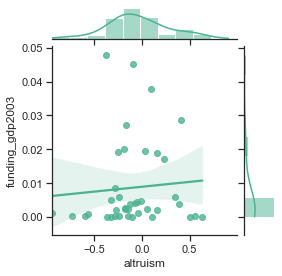

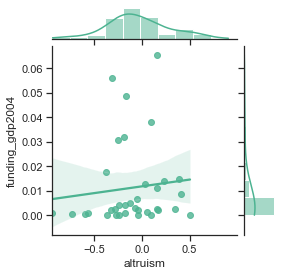

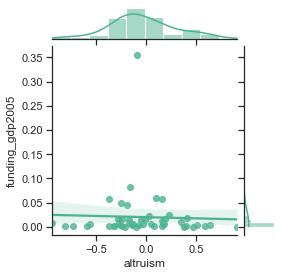

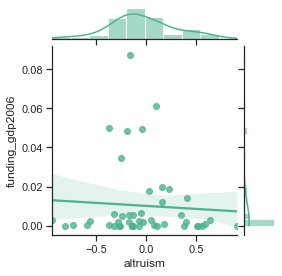

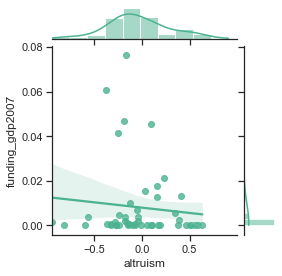

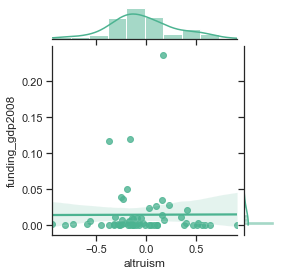

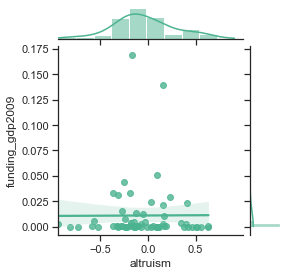

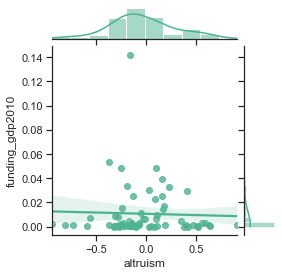

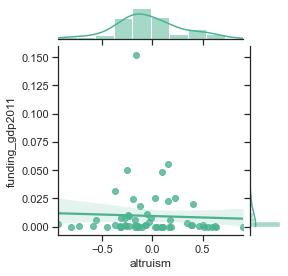

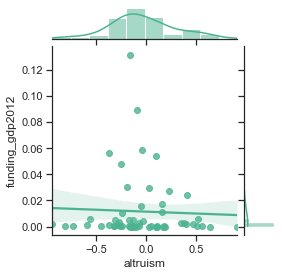

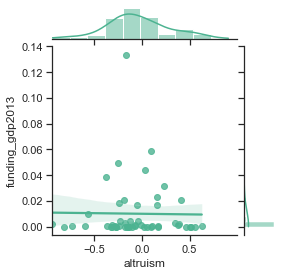

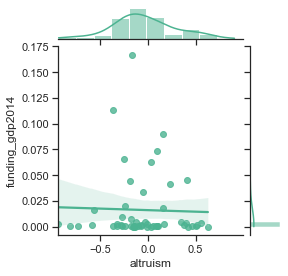

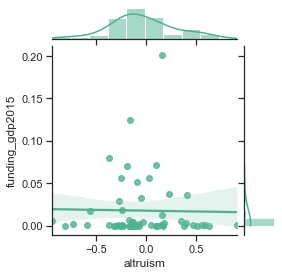

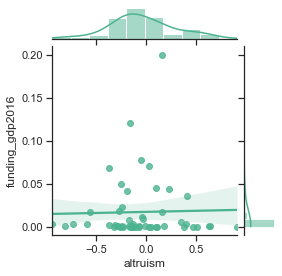

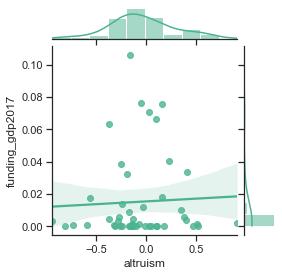

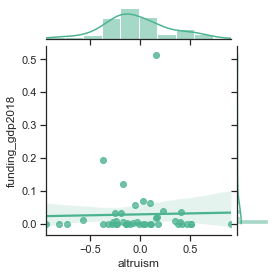

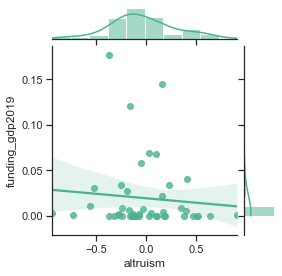

In [4]:
for i in range(17):
    y = add_prefix(i + 3, prefix='funding_gdp') 
    regplot('altruism', y,  df)


# 2. Altruism to democratic index 
# 2006 ~ 2019
# summary: stable negative correlation 

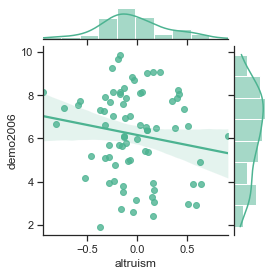

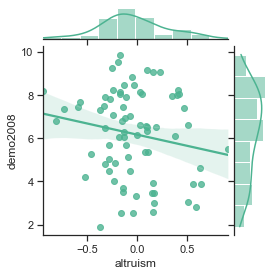

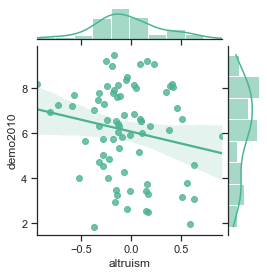

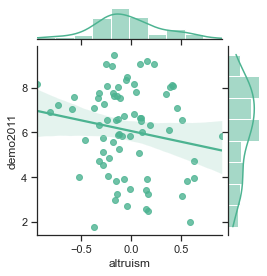

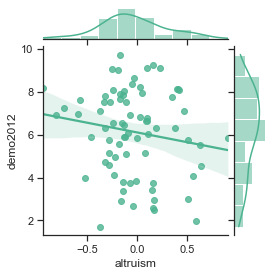

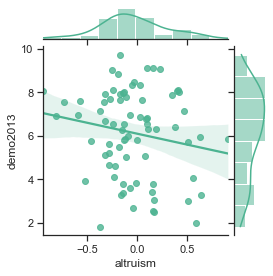

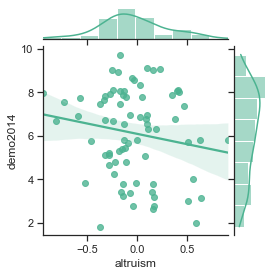

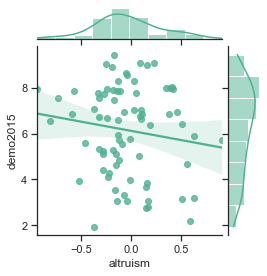

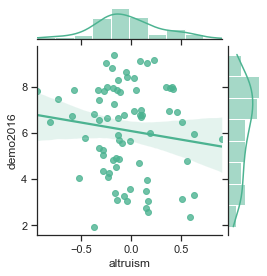

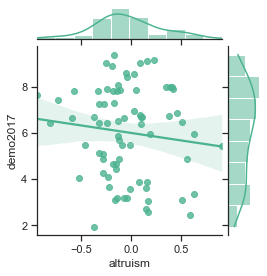

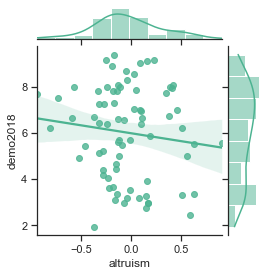

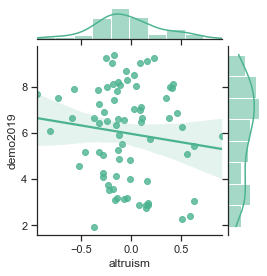

In [5]:
demo_year = sorted([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,  2008, 2006])
for i in range(len(demo_year)):
    y = 'demo' + str(demo_year[i])
    regplot('altruism', y,  df)


# 3. altruism to humanitarian donation per GDP shading by democratic index
# 2006 ~ 2019


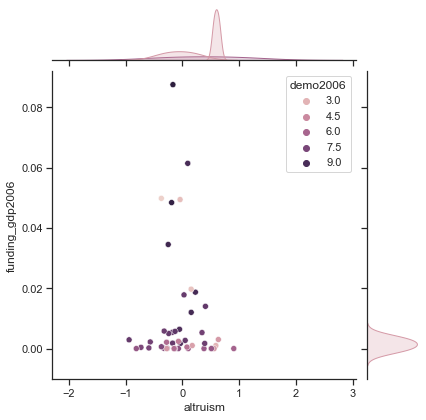

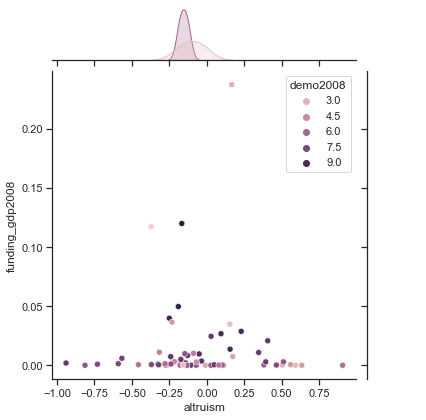

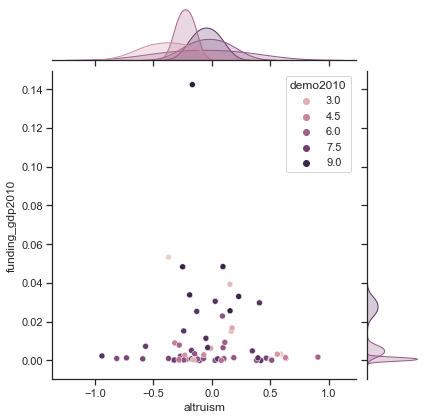

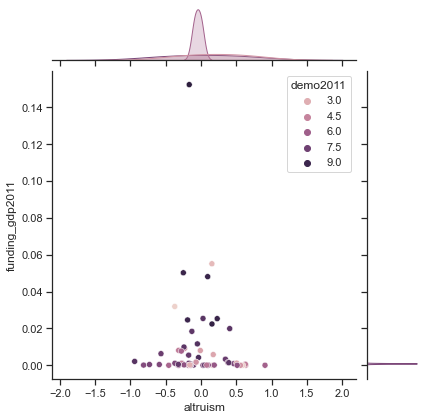

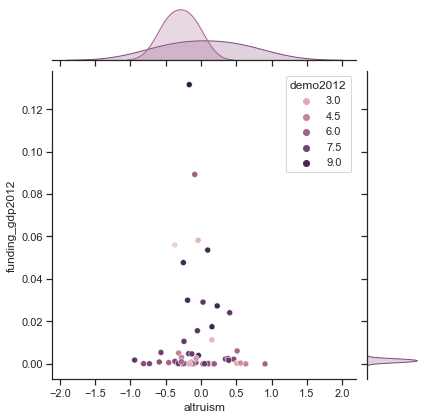

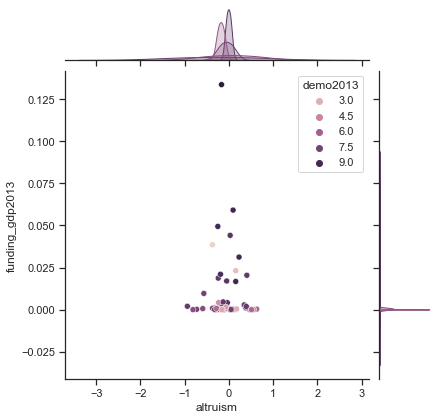

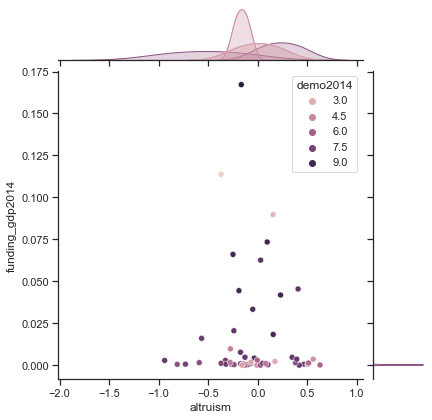

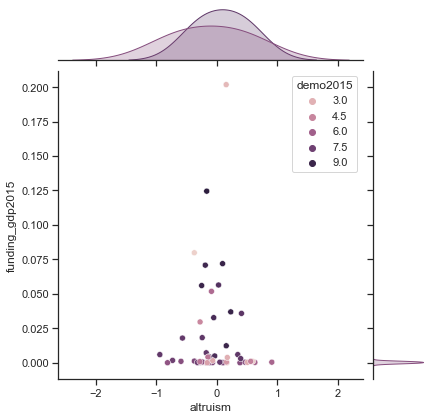

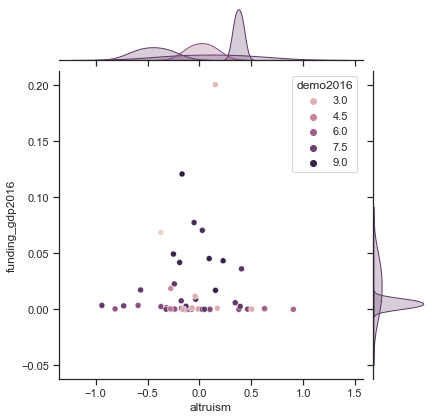

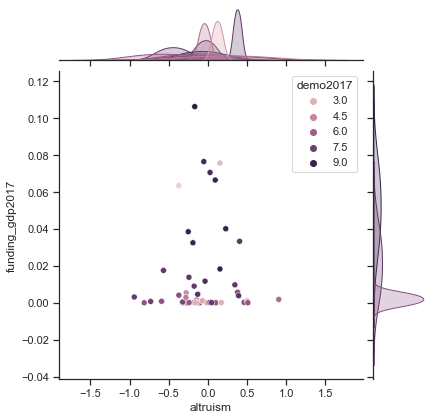

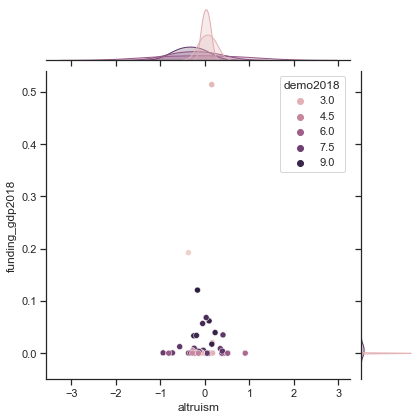

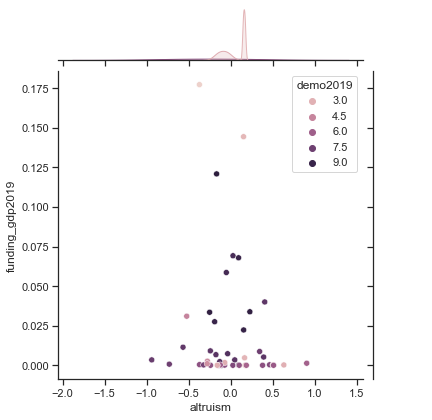

In [6]:
for i in range(len(demo_year)):
    z = 'demo' + str(demo_year[i])
    y = f'funding_gdp{demo_year[i]}'
    scatterplot('altruism', y, z, df)

# 4. listing country has maximum humanitarian donation per GDP by year
# 2003 ~ 2019
# summary: mixing of some most and least democratic countries

In [9]:
df_filter = df_index.filter(regex='funding_gdp.*')
df_filter.idxmax()


funding_gdp2003            Saudi Arabia
funding_gdp2004    United Arab Emirates
funding_gdp2005                  Malawi
funding_gdp2006                  Sweden
funding_gdp2007                  Sweden
funding_gdp2008             Afghanistan
funding_gdp2009                  Sweden
funding_gdp2010                  Sweden
funding_gdp2011                  Sweden
funding_gdp2012                  Sweden
funding_gdp2013                  Sweden
funding_gdp2014                  Sweden
funding_gdp2015    United Arab Emirates
funding_gdp2016    United Arab Emirates
funding_gdp2017                  Sweden
funding_gdp2018    United Arab Emirates
funding_gdp2019            Saudi Arabia
dtype: object

# 5. listing country has maximum humanitarian donation by year
# 2003 ~ 2019
# comment: United State always donate the most 

In [10]:
# df_index = df.set_index('country')
df_filter = df_index.filter(regex='funding_gdp[0-9]+$')
df_filter.idxmax()

funding_gdp2003            Saudi Arabia
funding_gdp2004    United Arab Emirates
funding_gdp2005                  Malawi
funding_gdp2006                  Sweden
funding_gdp2007                  Sweden
funding_gdp2008             Afghanistan
funding_gdp2009                  Sweden
funding_gdp2010                  Sweden
funding_gdp2011                  Sweden
funding_gdp2012                  Sweden
funding_gdp2013                  Sweden
funding_gdp2014                  Sweden
funding_gdp2015    United Arab Emirates
funding_gdp2016    United Arab Emirates
funding_gdp2017                  Sweden
funding_gdp2018    United Arab Emirates
funding_gdp2019            Saudi Arabia
dtype: object

# 6. nominal GDP growth rate to funding
# 2004 ~ 2019
# summary: mostly negative correlated


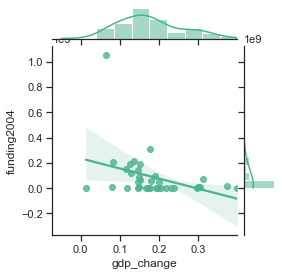

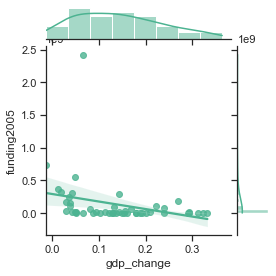

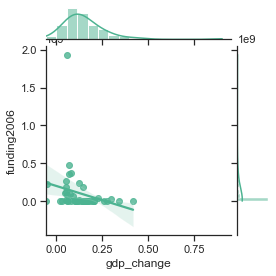

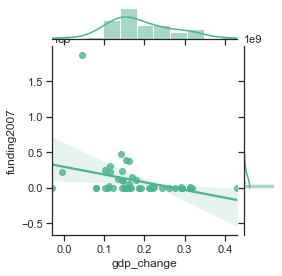

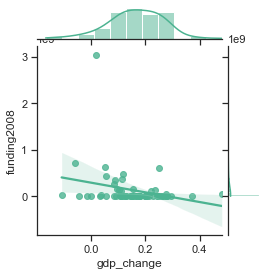

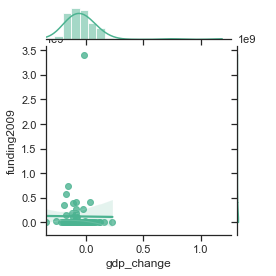

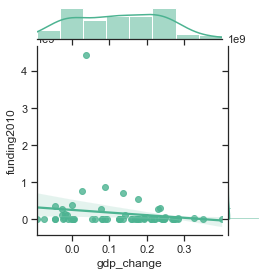

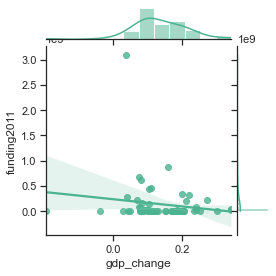

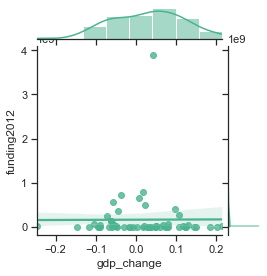

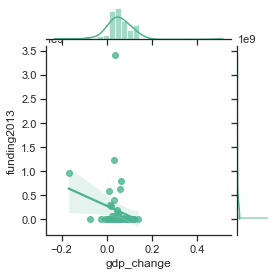

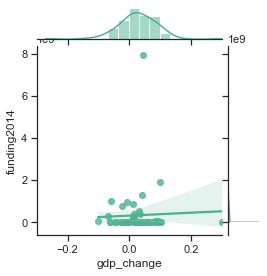

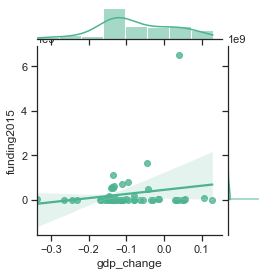

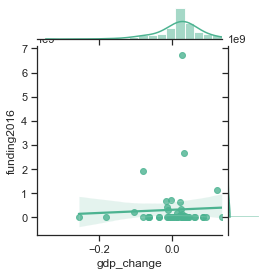

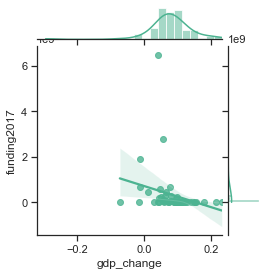

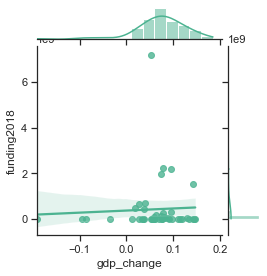

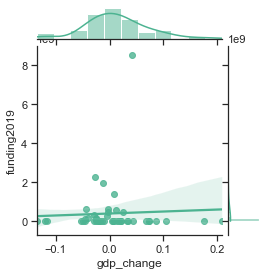

In [11]:

for i in range(16):
    gdp_last = add_prefix(i + 3, prefix='gdp')
    gdp_this = add_prefix(i + 4, prefix='gdp')
    df['gdp_change'] = df[gdp_this].div(df[gdp_last]).sub(1)
    y = add_prefix(i + 4, prefix='funding')
    regplot('gdp_change', y, df)

# 7. democratic to gdp
# 2006 ~ 2019
# summary: mild but clear positive correlation

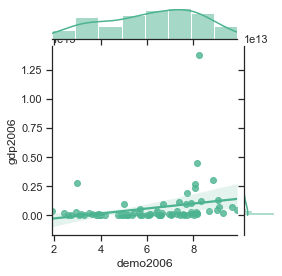

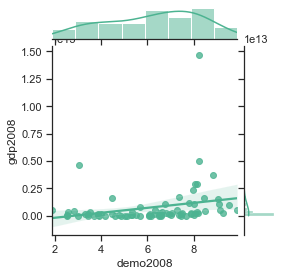

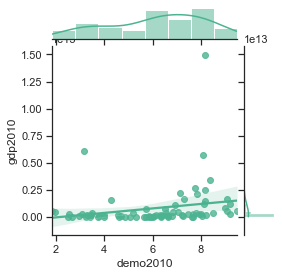

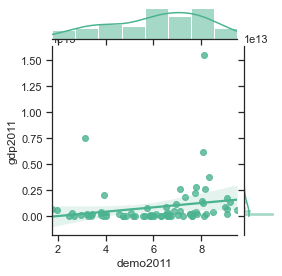

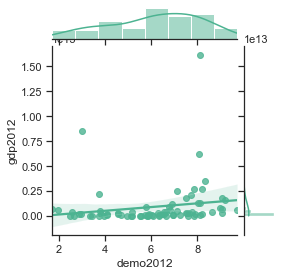

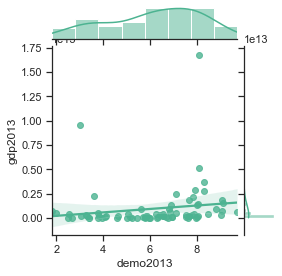

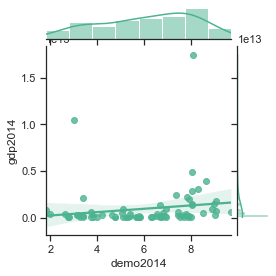

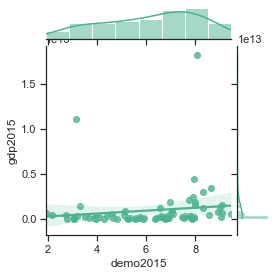

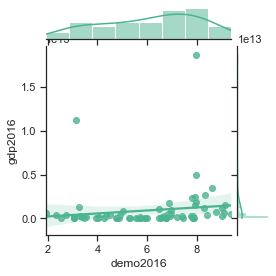

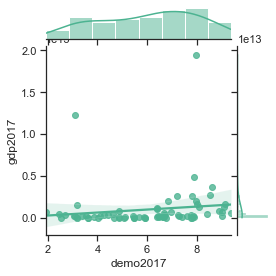

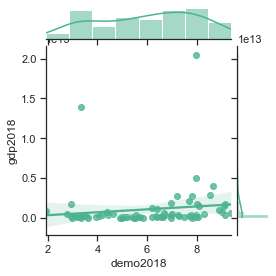

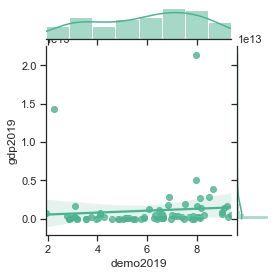

In [12]:
for i in range(len(demo_year)):
    x = 'demo' + str(demo_year[i])
    y = f'gdp{demo_year[i]}'
    regplot(x, y, df)

# 8. average funding per GDP to altruism categorize by receive aid or not
# 2003 ~ 2019

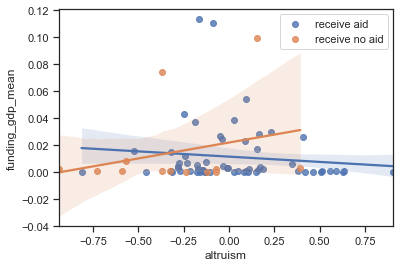

In [6]:
df_index['funding_gdp_mean'] = mean_country('funding_gdp[0-9]+', df)

df_true = df_index.query('aid_boolean == True')
df_false = df_index.query('aid_boolean == False')

sns.regplot('altruism', 'funding_gdp_mean', df_true, label='receive aid').legend()
sns.regplot('altruism', 'funding_gdp_mean', df_false, label='receive no aid').legend()


# 9. average funding per GDP to altruism categorize by country income type
# 2003 ~ 2019

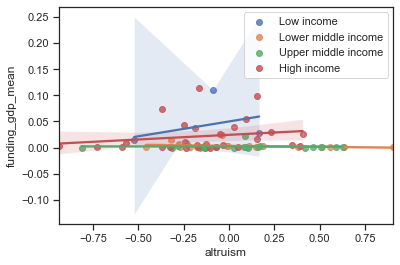

In [14]:
income = df['income_type'].unique().tolist()

for i in range(len(income)):
    df_select = df_index.query(f'income_type == "{income[i]}"')
    sns.regplot('altruism', 'funding_gdp_mean', df_select, label=f'{income[i]}').legend()



# 10. average funding per GDP to altruism categorize by region
# 2003 ~ 2019

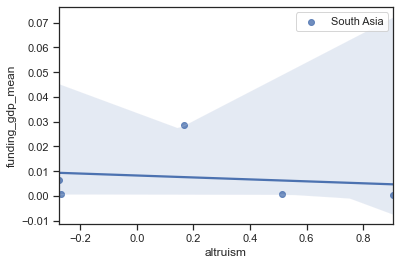

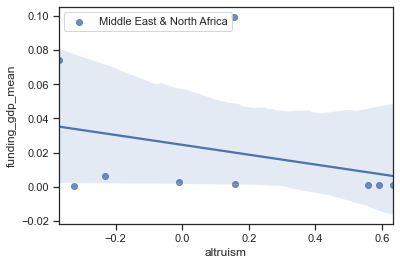

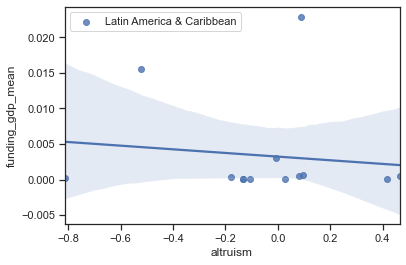

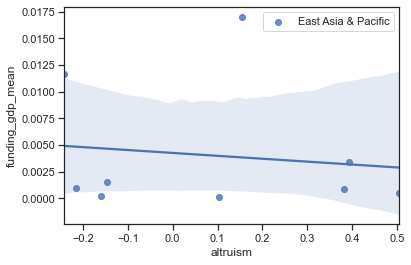

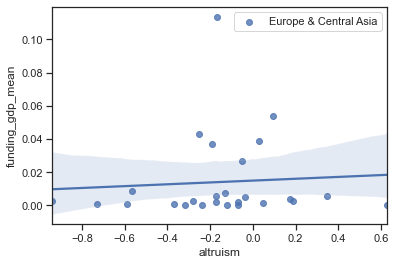

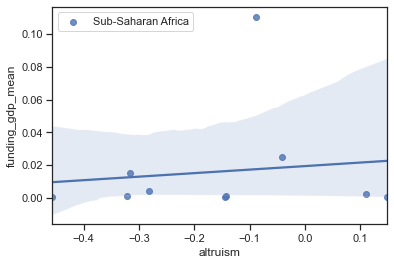

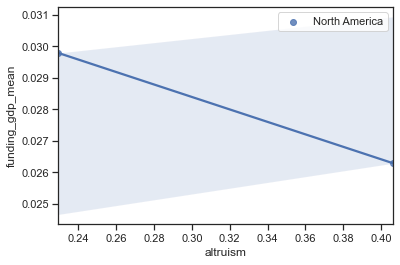

In [15]:
region = df['region'].unique().tolist()

for i in range(len(region)):
    df_select = df_index.query(f'region == "{region[i]}"')
    plt.figure()
    sns.regplot('altruism', 'funding_gdp_mean', df_select, label=f'{region[i]}', ).legend()

